In [1]:

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('books.csv', on_bad_lines='skip')
print(df.head())


   bookID                                              title  \
0       1  Harry Potter and the Half-Blood Prince (Harry ...   
1       2  Harry Potter and the Order of the Phoenix (Har...   
2       4  Harry Potter and the Chamber of Secrets (Harry...   
3       5  Harry Potter and the Prisoner of Azkaban (Harr...   
4       8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   

                      authors  average_rating        isbn         isbn13  \
0  J.K. Rowling/Mary GrandPré            4.57  0439785960  9780439785969   
1  J.K. Rowling/Mary GrandPré            4.49  0439358078  9780439358071   
2                J.K. Rowling            4.42  0439554896  9780439554893   
3  J.K. Rowling/Mary GrandPré            4.56  043965548X  9780439655484   
4  J.K. Rowling/Mary GrandPré            4.78  0439682584  9780439682589   

  language_code    num_pages  ratings_count  text_reviews_count  \
0           eng          652        2095690               27591   
1           eng         

In [3]:
#Data Exploration:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [4]:
df.describe()


,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


<Axes: xlabel='average_rating', ylabel='title'>

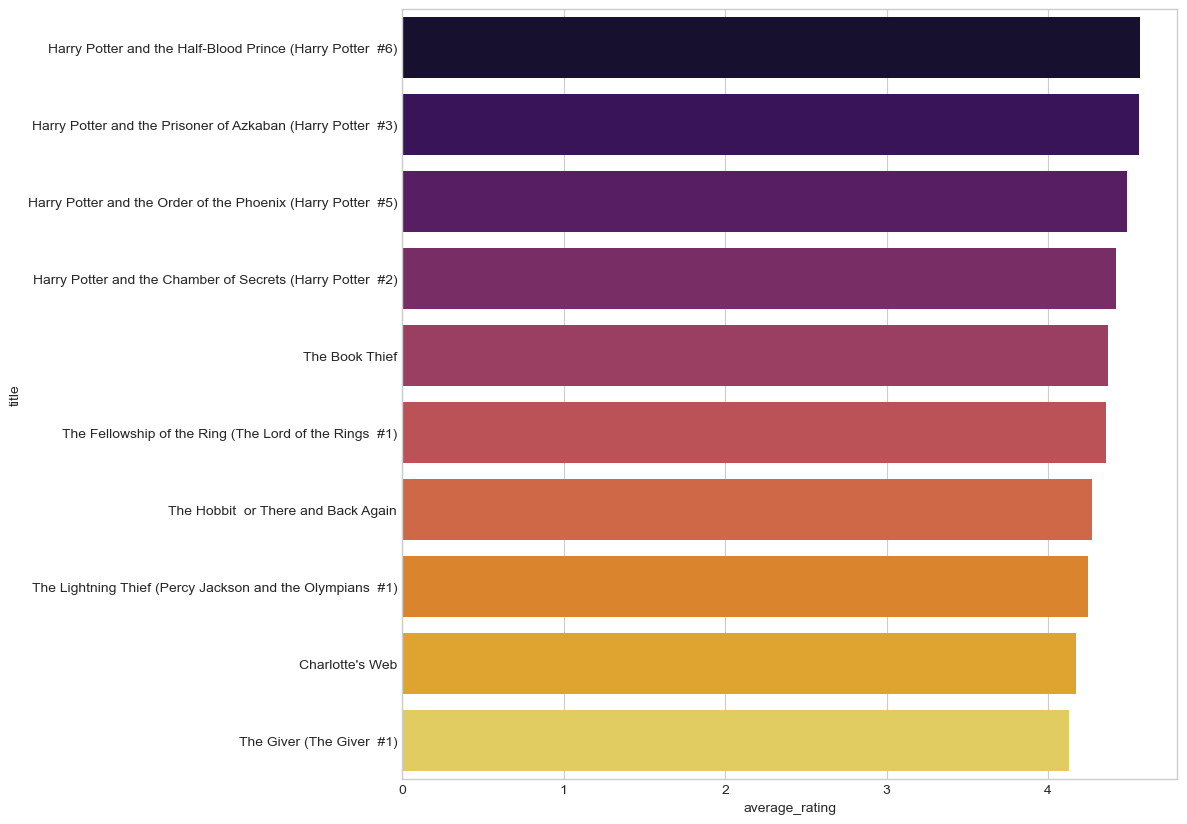

In [8]:
top_ten = df[df['ratings_count'] > 1000000]
top_ten.sort_values(by='average_rating', ascending=False)
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 10))
data = top_ten.sort_values(by='average_rating', ascending=False).head(10)
sns.barplot(x="average_rating", y="title", data=data, palette='inferno')

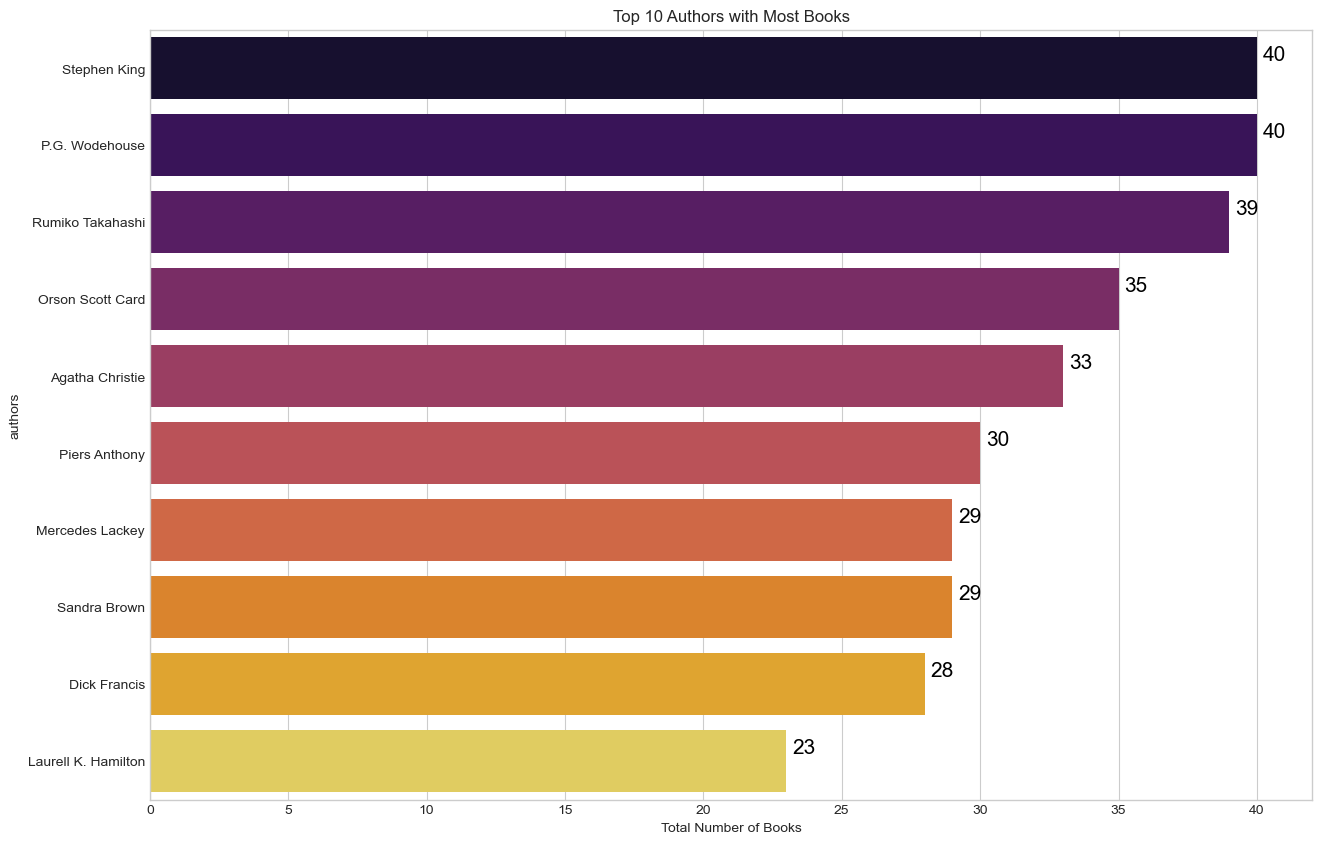

In [10]:

# Group by authors and count the number of titles, then sort and select top 10
most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')

# Plot the data
plt.figure(figsize=(15, 10))
ax = sns.barplot(x=most_books['title'], y=most_books.index, palette='inferno')
ax.set_title("Top 10 Authors with Most Books")
ax.set_xlabel("Total Number of Books")

# Add text annotations
for i in ax.patches:
    ax.text(i.get_width() + 0.2, i.get_y() + 0.3, str(round(i.get_width())), fontsize=15, color='black')

# Display the plot
plt.show()



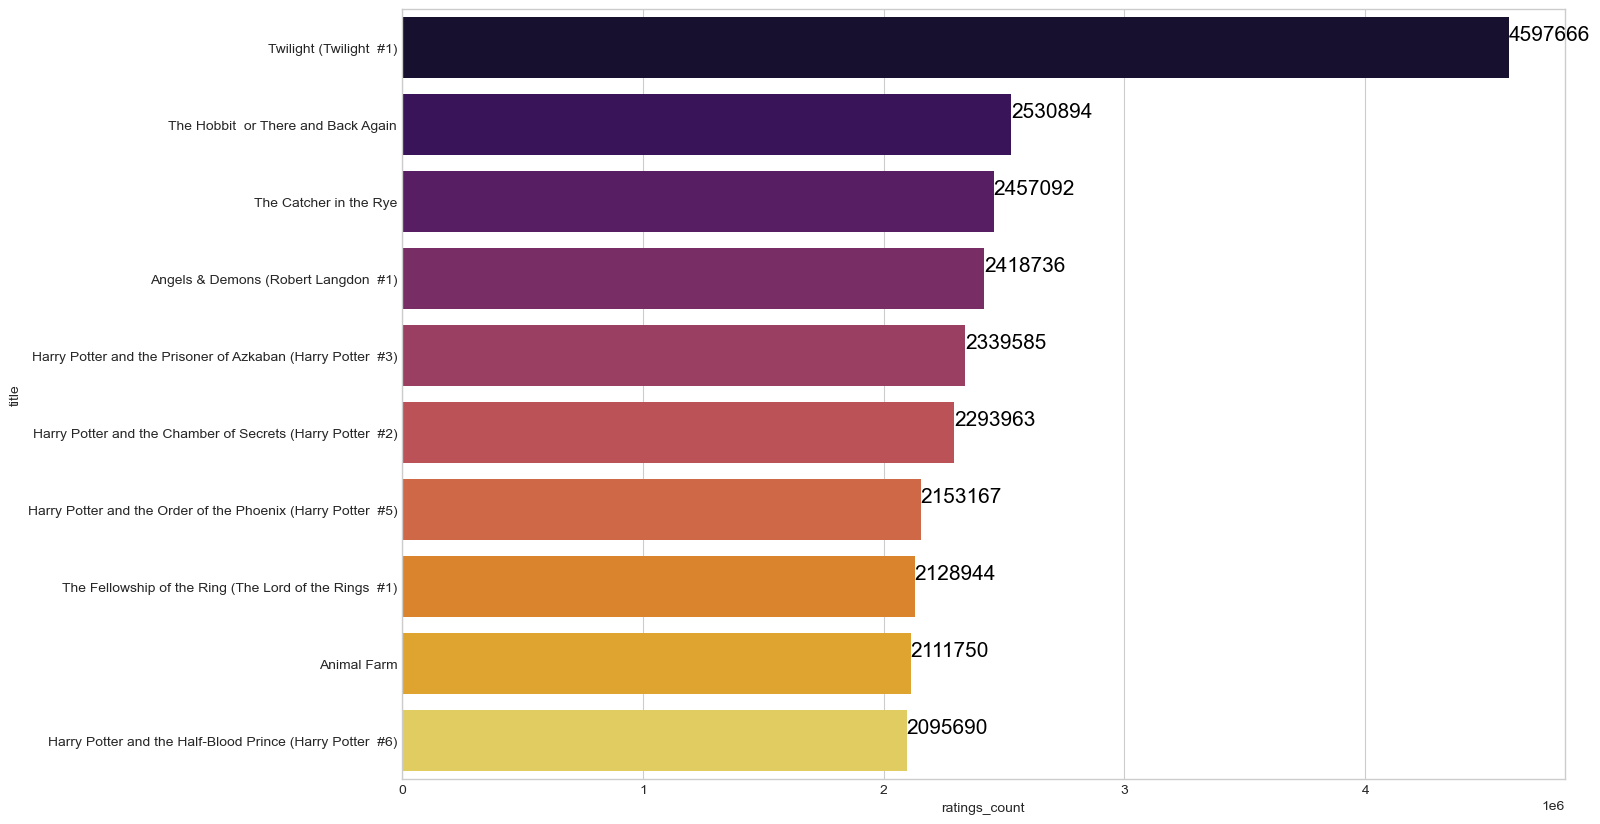

In [12]:
# Sort by ratings_count and select the top 10
most_rated = df.sort_values('ratings_count', ascending=False).head(10).set_index('title')

# Plot the data
plt.figure(figsize=(15, 10))
ax = sns.barplot(x=most_rated['ratings_count'], y=most_rated.index, palette='inferno')

# Add text annotations
for i in ax.patches:
    ax.text(i.get_width() + 0.2, i.get_y() + 0.3, str(int(i.get_width())), fontsize=15, color='black')



C:\Users\sachi\AppData\Local\Temp\ipykernel_16580\2988746623.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['average_rating'],ax=ax)
C:\Users\sachi\anaconda3\Installation\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Average rating')

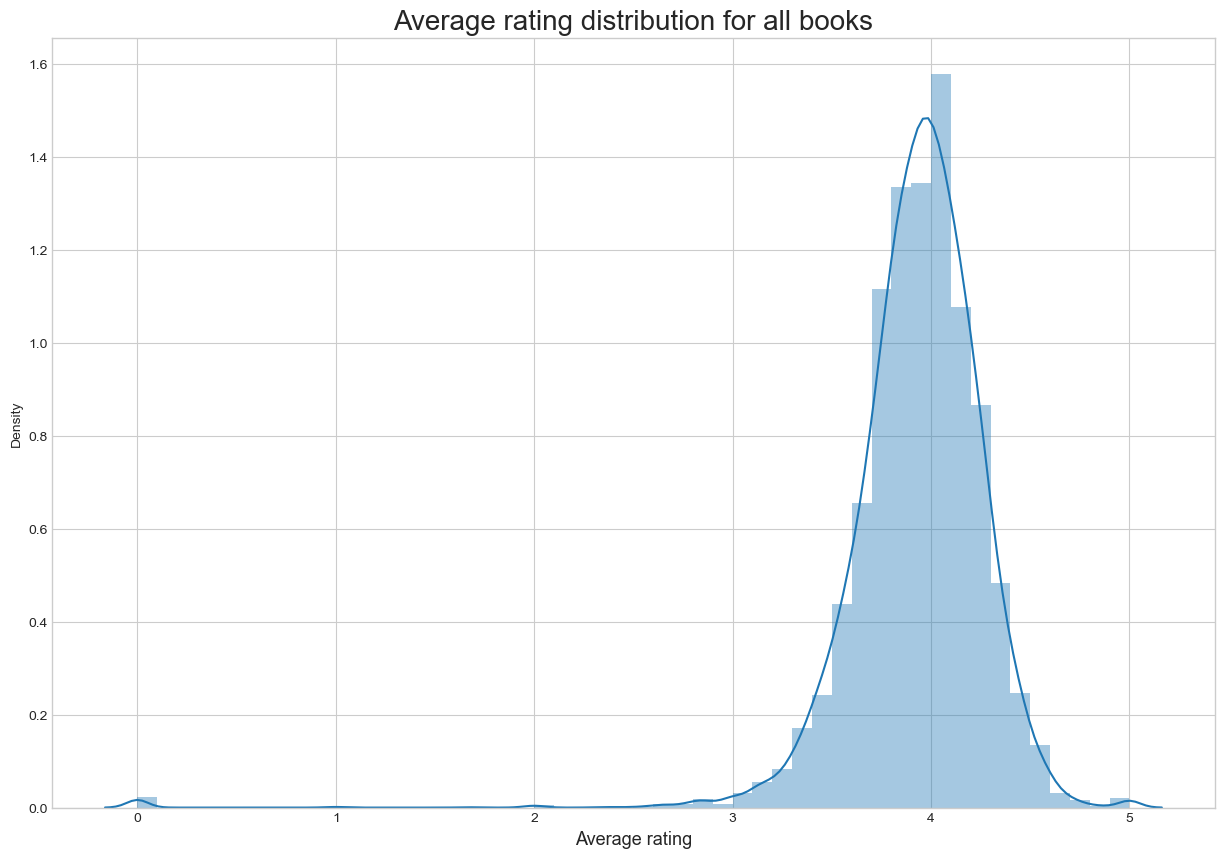

In [15]:
df.average_rating = df.average_rating.astype(float)
fig, ax = plt.subplots(figsize=[15,10])
sns.distplot(df['average_rating'],ax=ax)
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)

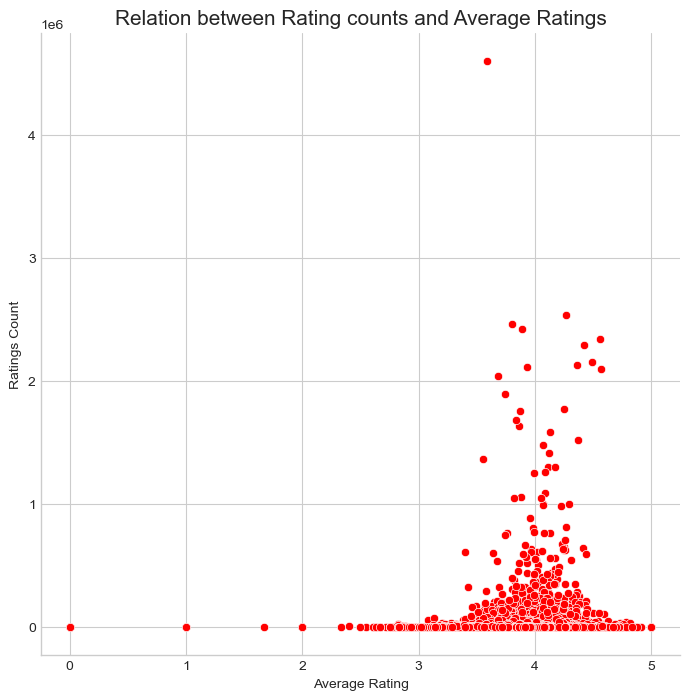

In [16]:
ax = sns.relplot(data=df, x="average_rating", y="ratings_count", color = 'red', sizes=(100, 200), height=7, marker='o')
plt.title("Relation between Rating counts and Average Ratings",fontsize = 15)
ax.set_axis_labels("Average Rating", "Ratings Count")

<Figure size 1500x1000 with 0 Axes>

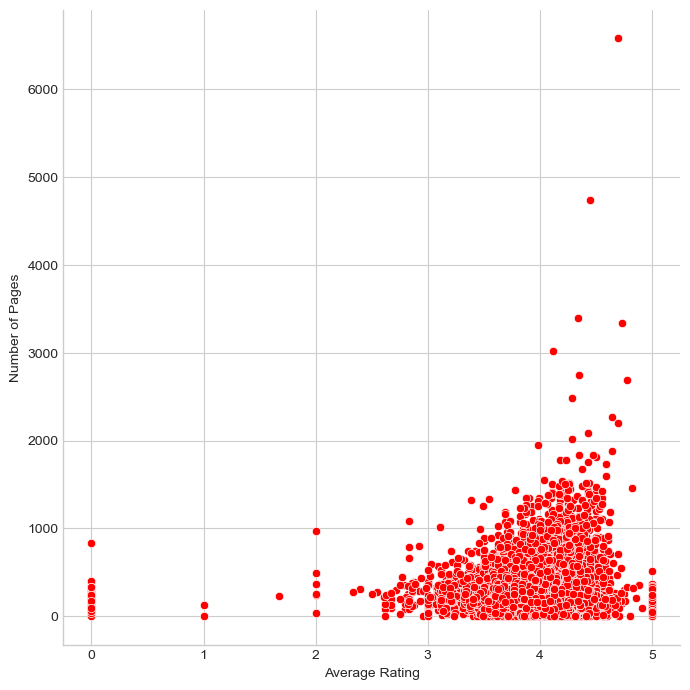

In [17]:

plt.figure(figsize=(15,10))
ax = sns.relplot(x="average_rating", y="  num_pages", data = df, color = 'red',sizes=(100, 200), height=7, marker='o')
ax.set_axis_labels("Average Rating", "Number of Pages")

In [19]:
df2 = df.copy()
#make a copy of our original data just to be safe

Data Preparation:


In [20]:

df2.loc[ (df2['average_rating'] >= 0) & (df2['average_rating'] <= 1), 'rating_between'] = "between 0 and 1"
df2.loc[ (df2['average_rating'] > 1) & (df2['average_rating'] <= 2), 'rating_between'] = "between 1 and 2"
df2.loc[ (df2['average_rating'] > 2) & (df2['average_rating'] <= 3), 'rating_between'] = "between 2 and 3"
df2.loc[ (df2['average_rating'] > 3) & (df2['average_rating'] <= 4), 'rating_between'] = "between 3 and 4"
df2.loc[ (df2['average_rating'] > 4) & (df2['average_rating'] <= 5), 'rating_between'] = "between 4 and 5"

'''We are now going to create two new DataFrames containing the different values of the rating_between column that we have just created. 
We will assign a value of 1 if one grade falls under a particular group, say 4 and 5, and the others will be assigned a value of 0.'''

In [21]:
rating_df = pd.get_dummies(df2['rating_between'])
language_df = pd.get_dummies(df2['language_code'])

In [22]:
features = pd.concat([rating_df, 
                      language_df, 
                      df2['average_rating'], 
                      df2['ratings_count']], axis=1)

Book Recommendation System: Final Step

In [24]:
#from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)
#We have reduced the features and we now can use the KNN algorithm to build our model

In [25]:
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(features)
dist, idlist = model.kneighbors(features)

In [26]:
def BookRecommender(book_name):
    book_list_name = []
    book_id = df2[df2['title'] == book_name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list_name.append(df2.loc[newid].title)
    return book_list_name
    
BookNames = BookRecommender('Harry Potter and the Half-Blood Prince (Harry Potter  #6)')
BookNames

['Harry Potter and the Half-Blood Prince (Harry Potter  #6)',
 'Harry Potter and the Order of the Phoenix (Harry Potter  #5)',
 'The Fellowship of the Ring (The Lord of the Rings  #1)',
 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)',
 'Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)',
 'The Lightning Thief (Percy Jackson and the Olympians  #1)']